In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import auc_from_sens_spec

In [3]:
results = []
for sens in [0.6, 0.7, 0.8, 0.9, 1.0]:
    for spec in np.linspace(0.5, 1.0, 20):
        scores = {
            'sens': sens,
            'spec': spec
        }
        for lmode in ['min', 'cmin']:
            for umode in ['max', 'max-acc']:
                for (p, n) in [(200, 800), (400, 600), (2000, 8000), (4000, 6000)]:
                    try:
                        interval = auc_from_sens_spec(
                            scores=scores,
                            eps=1e-4,
                            p=p,
                            n=n,
                            lower=lmode,
                            upper=umode
                        )
                        results.append((sens, spec, interval[0], interval[1], interval[1] - interval[0], lmode, umode, p, n))
                    except:
                        pass

In [4]:
data = pd.DataFrame(results, columns=['sens', 'spec', 'int0', 'int1', 'diff', 'lower', 'upper', 'p', 'n'])

In [5]:
sens = 0.7
p = 200
n = 800

def plot(sens, p, n, filename):
    plt.figure(figsize=(6, 3))

    tmp = data[(data['sens'] == sens) & (data['p'] == p) & (data['n'] == n)]

    tmp1 = tmp[(tmp['lower'] == 'min') & (tmp['upper'] == 'max')]
    plt.plot(tmp1['spec'], tmp1['diff'], label='A (min, max)', ls='solid', color='black')

    tmp1 = tmp[(tmp['lower'] == 'cmin') & (tmp['upper'] == 'max')]
    plt.plot(tmp1['spec'], tmp1['diff'], label='B (cmin, max)', ls='dashed', color='black')

    tmp1 = tmp[(tmp['lower'] == 'min') & (tmp['upper'] == 'max-acc')]
    plt.plot(tmp1['spec'], tmp1['diff'], label='C (min, amax)', ls='-.', color='black')

    tmp1 = tmp[(tmp['lower'] == 'cmin') & (tmp['upper'] == 'max-acc')]
    plt.plot(tmp1['spec'], tmp1['diff'], label='D (cmin, amax)', ls=':', color='black')

    plt.xlabel('spec')
    plt.ylabel(r'$U_{auc} - L_{auc}$')
    plt.title(f'sens = {sens}, p/n = {np.round(p/n, 2)}')

    plt.legend(title='estimation scheme')

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


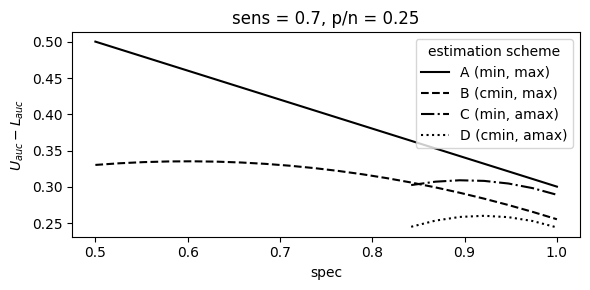

In [6]:
plot(0.7, 200, 800, 'p0.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


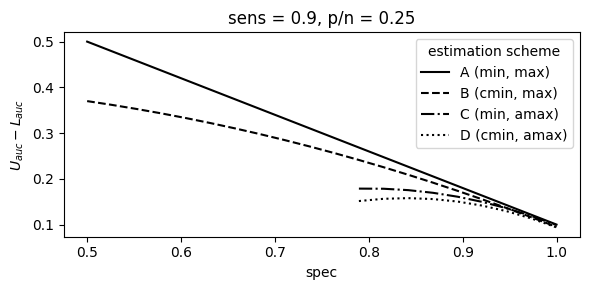

In [7]:
plot(0.9, 200, 800, 'p1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


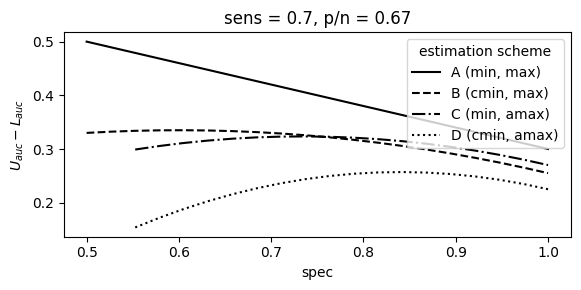

In [8]:
plot(0.7, 400, 600, 'p2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


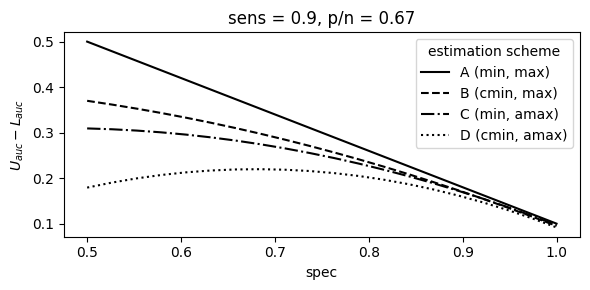

In [13]:
plot(0.9, 400, 600, 'p3.eps')

In [65]:
auc_from_sens_spec(scores={'spec': 0.868, 'sens': 0.878, 'acc': 0.868}, p=110, n=490, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.778183405, 0.9418563181818181)

In [67]:
from mlscorecheck.auc import acc_from_auc

In [92]:
#acc_from_auc(scores={'auc': 0.958}, p=117, n=493, eps=1e-4/2)
auc_from_sens_spec(scores={'spec': 0.906, 'sens': 0.615, 'acc': 0.855}, p=90, n=510, eps=1e-4/2, lower='min', upper='max-acc')

(0.5571139525000001, 0.9322306480448501)

In [104]:
#sk
#acc_from_auc(scores={'auc': 0.96}, p=90, n=390, eps=1e-4/2)
auc_from_sens_spec(scores={'spec': 0.925, 'sens': 0.733, 'acc': 0.897}, p=117, n=493, eps=1e-4/2, lower='min', upper='max')

(0.6779421025, 0.9799920975)

In [106]:
# 2016
auc_from_sens_spec(scores={'spec': 0.933, 'sens': 0.856, 'acc': 0.925}, p=110, n=490, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.811181605, 0.9812402513914656)

In [97]:
# drive
auc_from_sens_spec(scores={'spec': 0.9928, 'sens': 0.9268}, p=35, n=297, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.922740125, 0.9989447819894179)

In [105]:
# 2016
auc_from_sens_spec(scores={'spec': 0.413, 'sens': 0.987, 'acc': 0.873}, p=75, n=304, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.579960005, 0.9492332936973136)

In [136]:
#wang 2015

scores = {
    'sens': 0.7648,
    'spec': 0.9811,
    'acc': 0.9842
}

In [137]:
auc_from_sens_spec(scores=scores, p=294, n=1949, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.77810882, 0.9989109934341329)

In [135]:
acc_from_auc(scores={'auc': 0.9637}, p=29412, n=194965, eps=1e-4/2)

(np.float64(0.8713100974842332), 0.9685017570874019)

In [140]:
#scores={'spec': 0.9928, 'sens': 0.9268}
#p=35
#n=297
#acc=(p*sens + n*spec)/(p + n)

In [143]:
auc = 0.9637
p = 29412
n = 194965
acc = 0.9842

acc2 = 1 - 2*np.sqrt((1 - auc)*n*p)/(n + p)
auc2 = 1 - ((1 - acc)*(n + p))**2/(2*n*p)

acc2, auc2, auc >= 1 - min(n, p)/(2*max(n, p))

(np.float64(0.8713986354393413), 0.9989041284786389, True)

In [145]:
acc_from_auc(scores={'auc': 0.9637}, p=p, n=n, eps=1e-4/2)

(np.float64(0.8713100974842332), 0.9685017570874019)

In [152]:
acc_from_auc(scores={'auc': 0.851}, p=117, n=493, eps=1e-3)

ValueError: AUC too small

In [155]:
auc_from_sens_spec(scores={'sens': 0.402, 'spec': 0.719, 'acc': 0.852}, p=117, n=493, eps=1e-4/2, lower='cmin', upper='max-acc')

(0.507308405, 0.9293964021926631)

In [154]:
tp = 0
tn = 493
fp = 0
fn = 117
sens = tp / (tp + fn)
spec = tn / (tn + fp)
sens*spec

0.0

In [149]:
1 - 117/(2*493)

0.8813387423935091

In [108]:
from mlscorecheck.experiments import load_drive
tmp = load_drive()

In [111]:
tmp[(1, 'fov')]['test']

{'images': [{'identifier': '01', 'p': 29412, 'n': 194965},
  {'identifier': '02', 'p': 33723, 'n': 191364},
  {'identifier': '03', 'p': 32886, 'n': 192841},
  {'identifier': '04', 'p': 30343, 'n': 197234},
  {'identifier': '05', 'p': 30898, 'n': 196795},
  {'identifier': '06', 'p': 32105, 'n': 195394},
  {'identifier': '07', 'p': 30144, 'n': 197531},
  {'identifier': '08', 'p': 28311, 'n': 196937},
  {'identifier': '09', 'p': 26740, 'n': 200920},
  {'identifier': '10', 'p': 27152, 'n': 200180},
  {'identifier': '11', 'p': 29533, 'n': 198281},
  {'identifier': '12', 'p': 28490, 'n': 199115},
  {'identifier': '13', 'p': 32252, 'n': 195248},
  {'identifier': '14', 'p': 26631, 'n': 199223},
  {'identifier': '15', 'p': 23612, 'n': 203782},
  {'identifier': '16', 'p': 29791, 'n': 197903},
  {'identifier': '17', 'p': 27851, 'n': 198033},
  {'identifier': '18', 'p': 26144, 'n': 201468},
  {'identifier': '19', 'p': 27367, 'n': 200021},
  {'identifier': '20', 'p': 24264, 'n': 203259}],
 'citatio